# Trabalho prático de hash - T3 (AED) 
**Disciplina:** ESTCMP011 - Algoritmos e Estruturas de Dados I (2020/01)               
**Victor Hugo Santos de Lima** - 1915080025                      
**Giovanna Souza Teodoro** - 1915080065                                 

 

*Antes de executar as células, favor montar o drive com o código abaixo.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Caso não queira montar pelo drive, faça upload dos arquivos pelas células abaixo.*                                  
**Além do arquivo .csv, é necessário o textfile com uma sequência de números primos.**

**uol.csv**

In [ ]:
from google.colab import files
uploaded = files.upload()

**primos.txt**

In [ ]:
from google.colab import files
uploaded = files.upload()

# Setup do ambiente

In [ ]:
'''
  Conjunto de bibliotecas necessárias ao longo da execução das células
'''
import matplotlib.pyplot as plt       # Construção do gráfico 
import numpy as np                    # Construção do gráfico
from math import sqrt, pow            # Construção da terceira tabela 
import time                           # Cronômetro 
import unicodedata                    # Retira os caracteres especiais
import pandas as pd                   # Leitura do csv 
import nltk                           # Limpeza do 'text' do dataframe
from nltk import tokenize             # Quebra de sentenças 
nltk.download('punkt')

exe_hash1 = []                        # Listas que serao utilizadas para           
exe_hash2 = []                        # armazenar o tempo de execucao de
exe_hash3 = []                        # cada tabela hash 

'''
  Descomente a linha a partir do método pelo qual optou 
'''
# PELO DRIVE
dataframe = pd.read_csv('/content/drive/Shared drives/TabelaHashAED/uol.csv') 
# PELO UPLOAD
#dataframe = pd.read_csv('./uold.csv')

text = []
for i in dataframe['text']:  
    i = i.replace("\', \'", ' ').replace("\', \"", ' ').replace("\", \'", ' ')
    i = i.replace("\", \"", ' ').replace("[\'", "").replace("[\"", "")
    i = i.replace("\']", "").replace("\"]", "")
    tk = tokenize.sent_tokenize(i)
    text.append(tk)
    
'''
  Descomente a linha a partir do método pelo qual optou 
'''
# PELO DRIVE 
file = open("/content/drive/Shared drives/TabelaHashAED/primos.txt", 'r')
# PELO UPLOAD
#file = open("./primos.txt", 'r')

primes = file.readlines()[0].split()  # Arquivo com todos os primos entre 2 e
                                      # 32452909, será usado na construção das 
                                      # tabelas 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Classes das tabelas hash

**Primeira tabela hash**

In [ ]:
class HashTable1:             
    def __init__(self, primes, length):
        self.length = length      
        self.slots = [None] * self.length  # Cria uma tabela com length posições    
        self.primes = primes                  
        self.count = 0  # Número de entradas únicas na tabela 
    
    # Função que transforma uma palavra em um inteiro, que será o índice
    def get_index(self, key):   
        (unicode_str, hashcode) = ('', 0)
        # Itera cada letra da palavra key
        for i in key: 
            # Função ord() retorna um inteiro que é concatenado à string abaixo  
            unicode_str += str(ord(i))  
            # index que será usado para acessar um valor da lista com os primos
            primes_index = int(unicode_str) % len(self.primes)    
            # Inteiro que é somado ao produto do int gerado pela concatenação
            # e um valor da lista dos inteiros primos na posição primes_index
            hashcode += int(unicode_str) * int(self.primes[primes_index])    
        # Limita o index ao tamanho da tabela
        index = hashcode % self.length                                      
        return index                                                        

    # Função chamada a partir da função rehash(), para alocar os dados antigos 
    # à nova tabela                              
    def rehash(self, aux_slots):
        # Percorre a cópia da antiga tabela  
        for i in aux_slots:
            # Se achar uma entrada, usa a função add() para adicionar à nova
            # tabela
            if i is not None:  
                self.add(i[0], i[1], i[2])
        # Elimina as entradas da tabela cópia 
        aux_slots = None
    
    # Função chamada a partir da função rehash(), para dobrar o tamanho atual e
    # arredondar para o valor primo maior e mais próximo
    def get_prime(self):
        # Dobra o atual tamanho
        self.length *= 2
        # Percorre a lista dos valores primos
        for i in self.primes:
            # Retorna o primo maior que o dobro do tamanho
            if int(i) > self.length:
                self.length = int(i)
                return int(i)
    
    # Função chamada a partir da função add(), quando o número de entradas únicas
    # ultrapassa 75% do tamanho da tabela
    def resize(self):
        # Reseta o contador de entradas únicas
        self.count = 0
        # Chama a função que define o novo tamanho
        length = self.get_prime()
        # Cria uma cópia da tabela 
        aux_slots = self.slots.copy()
        # Cria uma nova tabela vazia de tamanho dobrado
        self.slots = [None] * length
        # Chama a função que irá alocar novamente os dados 
        self.rehash(aux_slots)

    # Esta função é a implementação de um algoritmo de tratamento de colisões
    # chamado Robin Hood, que permite que valores que colidam sejam armazenados
    # mais próximos aos seus índices originais ao manter registrado a distância 
    # dos valores à colisão. Além disso, os valores podem trocar de posição
    # com quem colidiram se a distância aos seus índices originais for maior 
    # que a do objeto com quem colidiu 
    def robin_hood(self, index, info):
        # Variável que registra a distância do elemento a sua posição original
        pos = 0
        # Laço que só é quebrado quando um elemento é registrado em uma posição
        # vazia da tabela, ou quando se acrescenta informação a uma palavra já
        # registrada
        while True:
            # Verifica se a posição index está vaga 
            if self.slots[index] is None:
                # Acrescenta as informações à tabela
                self.slots[index] = [info[0], info[1], info[2], pos]
                # Incrementa o contador de registros únicos na tabela
                self.count += 1
                break
            # Verifica se a palavra contida na lista info é igual a palavra 
            # registrada na posição index 
            elif self.slots[index][0] == info[0]:
                # Verifica se o título passado é um valor None
                if info[1][0] is not None:
                    # Adiciona o título à posição index
                    self.slots[index][1].append(info[1][0])
                # Verifica se a sentença passada é um valor None
                if info[2][0][0] is not None:
                    # Adiciona a sentença à posição index 
                    self.slots[index][2].append(info[2][0])
                break
            # Verifica se a distância do elemento a seu índice original é maior
            # que a do elemento presente na posição index 
            elif pos > self.slots[index][3]:
                # Copia as informações do elemento que irá "roubar" o lugar do
                # elemento que estava menos distante do index original
                (new_pos, new_info) = (pos, info)
                # Copia as informações do elemento que "cedeu" sua posição
                (pos, info) = (self.slots[index][3], self.slots[index])
                # Substitui os dados na posição index
                self.slots[index] = [new_info[0], new_info[1], new_info[2], new_pos]
                
            # Incrementa a variável que registra a distância ao índice original
            pos += 1
            # Incrementa o índice
            index = (index + 1) % self.length
    
    # Função que adiciona uma nova palavra à tabela
    def add(self, key, title, text):
        # Verifica se o título passado é uma lista  
        if type(title) is not type([]):
            # Se não for, transforma o título em uma lista
            title = [title]
        # Verifica se a lista text na posição 0 é uma lista
        if type(text[0]) is not type([]):
            # Se não for, é transformada em uma lista
            text = [text]
        # Obtém o inteiro associado à palavra key passada como argumento
        index = self.get_index(key)
        # Chama a função robin_hood() na posição index
        self.robin_hood(index, [key, title, text, 0])
        # Verifica se o contador de entradas únicas é maior que 75% da tabela
        if self.count > int(self.length * 0.75):
            # Se for o caso, chama a função que irá dobrar o tamanho da tabela
            self.resize()
    
    # Função que acessa as informações associadas a uma palavra a partir do
    # index dela
    def search(self, word):
        # Retira acentos e caracteres especiais da string word, além de deixá-la
        # minúscula 
        key = unicodedata.normalize("NFD", word.lower())
        key = key.encode("ascii", "ignore").decode("utf-8")

        # Obtém o index associado a palavra
        index = self.get_index(key)

        # Variáveis que indicam se algum título ou sentença foi imprimido
        title_wf = text_wf = False
        # Verifica se a tabela na posição index tem o valor None
        if self.slots[index] is not None:
            # Verifica se o palavra armazenada na posição index é igual a 
            # palavra pesquisada 
            if self.slots[index][0] != key:
                # Se for diferente, itera até achar a posição correta
                while True:
                    # incrementa o index
                    index = (index + 1) % self.length
                    # Verifica se as palavras se assemelham
                    if self.slots[index][0] == key:
                        break
            # Itera na lista contendo todos os títulos associados a palavra
            for i in self.slots[index][1]:
                # Verifica se o valor atual é None
                if i is not None:
                    # Verifica se é a primeira iteração 
                    if not title_wf: 
                        print("Títulos com a palavra " + word + ":")
                        # Garante que o texto acima não mais será imprimido
                        title_wf = True
                    # Imprime o título 
                    print(dataframe['title'][i])  
            # Itera na lista contendo todas as sentenças associadas a palavra 
            for i in self.slots[index][2]:
                # Verifica se o valor atual é None  
                if i[0] is not None:
                    # Verifica se é a primeira iteração
                    if not text_wf: 
                        print("\n\nSentenças com a palavra " + word + ":")
                        # Garante que o texto acima não mais será imprimido
                        text_wf = True
                    # Imprime a sentença
                    print(text[i[0]][i[1]])
        # Mostra que não achou resultados quando nenhum título e sentença
        # foram imprimidos acima, ou quando o array na posição do index
        # possui o valor None
        if (not title_wf and not text_wf) or self.slots[index] is None: 
            print("No Results Found!")

**Segunda tabela hash**

In [ ]:
class HashTable2:             
    def __init__(self, primes, length):
        self.length = length  
        self.slots = [None] * self.length
        self.primes = primes
        self.count = 0 
 
    def get_index(self, key): 
        (unicode_str, hashcode) = ('', 0)
        for i in key:
            # Concatena cada inteiro associado com a letra atual da iteração
            unicode_str += str(ord(i))
            # Transforma a string a cima em inteiro e a multiplica por 2 elevado
            # y, onde y é qualquer inteiro primo dentro do intervalo [2, 31].
            # Feito isso, soma-se o resultado à variável hashcode
            hashcode += int(unicode_str) << int(primes[int(unicode_str) % 11])
            # Compara cada digito binário da variável hashcode a cada digito   
            # binário de um primo pseudoaleatório, e retorna 1 caso qualquer 
            # um dos dois valores for 1, e 0 caso contrário
            hashcode |= int(self.primes[int(unicode_str) % len(self.primes)]) 
        index = hashcode % self.length
        return index
 
    def rehash(self, aux_slots):  
        for i in aux_slots:
            if i is not None:  
                self.add(i[0], i[1], i[2])
 
    def get_prime(self):
        self.length *= 2
        for i in self.primes:
            if int(i) > self.length:
                self.length = int(i)
                return int(i)
 
    def resize(self):
        self.count = 0
        length = self.get_prime()
        aux_slots = self.slots.copy()
        self.slots = [None] * length
        self.rehash(aux_slots)

    def robin_hood(self, index, info):
        pos = 0
        while True:
            if self.slots[index] is None:
                self.slots[index] = [info[0], info[1], info[2], pos]
                self.count += 1
                break
            elif self.slots[index][0] == info[0]:
                if info[1][0] is not None:
                    self.slots[index][1].append(info[1][0])
                if info[2][0][0] is not None:
                    self.slots[index][2].append(info[2][0])
                break
            elif pos > self.slots[index][3]:
                (new_pos, new_info) = (pos, info)
                (pos, info) = (self.slots[index][3], self.slots[index])
                self.slots[index] = [new_info[0], new_info[1], new_info[2], new_pos]
            pos += 1
            index = (index + 1) % self.length
 
    def add(self, key, title, text):
        if type(title) is not type([]):
            title = [title]
        if type(text[0]) is not type([]):
            text = [text]
        index = self.get_index(key)
        self.robin_hood(index, [key, title, text, 0])
        if self.count > int(self.length * 0.75):
            self.resize()
                
    def search(self, word):
        key = unicodedata.normalize("NFD", word.lower())
        key = key.encode("ascii", "ignore").decode("utf-8")
 
        index = self.get_index(key)
 
        title_wf = text_wf = False
        if self.slots[index] is not None:
            if self.slots[index][0] != key:
                while True:
                    index = (index + 1) % self.length
                    if self.slots[index][0] == key:
                        break
            for i in self.slots[index][1]:
                if i is not None:
                    if not title_wf: 
                        print("Títulos com a palavra " + word + ":")
                        title_wf = True
                    print(dataframe['title'][i])   
            for i in self.slots[index][2]:  
                if i[0] is not None:
                    if not text_wf: 
                        print("\n\nSentenças com a palavra " + word + ":")
                        text_wf = True
                    print(text[i[0]][i[1]])
        if (not title_wf and not text_wf) or self.slots[index] is None: 
            print("No Results Found!")

**Terceira tabela hash**

In [ ]:
class HashTable3:             
    def __init__(self, primes, length):
        self.length = length  
        self.slots = [None] * self.length
        self.primes = primes
        self.count = 0 
 
    def get_index(self, key):
        hashcode = 0
        for i in key:
          hashcode += (self.fibonacci(ord(i)//3) << 7) # Como o tempo de execucao de self.fibonacci 
        index = hashcode % self.length                 # aumenta se o numero for grande, por isso a
        return index                                   # divisao por tres (e multiplicacao por 2^7)

    def fibonacci(self, n):                            # sequencia de fibonacci - formula fechada 
        raiz5 = sqrt(5)                                # cresce exponencialmente
        return int((1/raiz5)*(pow((1+raiz5)/2,n)-pow((1-raiz5)/2,n)))

    def rehash(self, aux_slots):  
        for i in aux_slots:
            if i is not None:  
                self.add(i[0], i[1], i[2])
 
    def get_prime(self):
        self.length *= 2
        for i in self.primes:
            if int(i) > self.length:
                self.length = int(i)
                return int(i)
 
    def resize(self):
        self.count = 0
        length = self.get_prime()
        aux_slots = self.slots.copy()
        self.slots = [None] * length
        self.rehash(aux_slots)

    def robin_hood(self, index, info):
        pos = 0
        while True:
            if self.slots[index] is None:
                self.slots[index] = [info[0], info[1], info[2], pos]
                self.count += 1
                break
            elif self.slots[index][0] == info[0]:
                if info[1][0] is not None:
                    self.slots[index][1].append(info[1][0])
                if info[2][0][0] is not None:
                    self.slots[index][2].append(info[2][0])
                break
            elif pos > self.slots[index][3]:
                (new_pos, new_info) = (pos, info)
                (pos, info) = (self.slots[index][3], self.slots[index])
                self.slots[index] = [new_info[0], new_info[1], new_info[2], new_pos]
            pos += 1
            index = (index + 1) % self.length
 
    def add(self, key, title, text):
        if type(title) is not type([]):
            title = [title]
        if type(text[0]) is not type([]):
            text = [text]
        index = self.get_index(key)
        self.robin_hood(index, [key, title, text, 0])
        if self.count > int(self.length * 0.75):
            self.resize()
                
    def search(self, word):
        key = unicodedata.normalize("NFD", word.lower())
        key = key.encode("ascii", "ignore").decode("utf-8")
 
        index = self.get_index(key)
 
        title_wf = text_wf = False
        if self.slots[index] is not None:
            if self.slots[index][0] != key:
                while True:
                    index = (index + 1) % self.length
                    if self.slots[index][0] == key:
                        break
            for i in self.slots[index][1]:
                if i is not None:
                    if not title_wf: 
                        print("Títulos com a palavra " + word + ":")
                        title_wf = True
                    print(dataframe['title'][i])   
            for i in self.slots[index][2]:  
                if i[0] is not None:
                    if not text_wf: 
                        print("\n\nSentenças com a palavra " + word + ":")
                        text_wf = True
                    print(text[i[0]][i[1]])
        if (not title_wf and not text_wf) or self.slots[index] is None: 
            print("No Results Found!")

# Definição dos tamanhos


**Tamanho 1:** 10856173 - Definido a partir do número total de palavras do arquivo csv

**Tamanho 2:** 7421923 - Definido aleatoriamente a partir da lista primes obedecendo o intervalo [Tamanho3, Tamanho1]

**Tamanho 3:** 2600013 - Definido a partir da lista de elementos da lista primes  

**Tamanho 4:** 780029 - Definido a partir do número total de palavras da Língua Portuguesa

**Tamanho 5:** 23929 - Definido a partir do número de linhas do arquivo csv

# Palavra a ser pesquisada:

In [ ]:
Palavra = "corona" #@param {type:"string"}

# Primeira tabela hash 

**Criação:**

In [ ]:
hash_tam1 = HashTable1(primes, 10856173)  
hash_tam2 = HashTable1(primes, 7421923)
hash_tam3 = HashTable1(primes, 2600013)
hash_tam4 = HashTable1(primes, 780029)
hash_tam5 = HashTable1(primes, 23929)

start = time.time()

# Títulos
for i in range(len(dataframe['title'])):
    titulo = tokenize.sent_tokenize(dataframe['title'][i])[0].split()
    for j in titulo:
        # O i será o index do título
        hash_tam1.add(j, i, [None])  
        hash_tam2.add(j, i, [None])
        hash_tam3.add(j, i, [None])
        hash_tam4.add(j, i, [None])
        hash_tam5.add(j, i, [None])

end = time.time()

print("Tempo de execução dos títulos: ", round(end - start, 6), " segundo(s)")

start = time.time()

# Textos
for i in range(len(text)):
    for j in range(len(text[i])):
        # Torna a string com a sentença em uma lista de palavras
        palavras = unicodedata.normalize("NFD", text[i][j].lower())
        palavras = palavras.encode("ascii", "ignore").decode("utf-8").split()
        for k in palavras:
            # i e j são os índices da sentença
            hash_tam1.add(k, None, [i, j])  
            hash_tam2.add(k, None, [i, j])
            hash_tam3.add(k, None, [i, j])
            hash_tam4.add(k, None, [i, j])
            hash_tam5.add(k, None, [i, j])

end = time.time()

print("Tempo de execução das sentenças: ", round(end - start, 6), " segundo(s)")


Tempo de execução dos títulos:  10.509602  segundo(s)
Tempo de execução das sentenças:  405.91201  segundo(s)


**Pesquisa:**

In [ ]:
#@title Primeira tabela - primeiro tamanho 

start = time.time()

hash_tam1.search(Palavra)  # Pesquisa na primeira tabela
                            # para o primeiro tamanho
end = time.time()

tempo_exe11 = round((end - start), 5)
exe_hash1.append(tempo_exe11)


print("\nTempo de Execução: " , tempo_exe11, " segundo(s)")



Títulos com a palavra corona:
corona beer nome de cerveja mexicana gera confusao com novo coronavirus
cerveja corona tambem e vitima de coronavirus
fabricante da cerveja corona diz que vendas nos eua continuam fortes
vai viajar ao exterior veja que cuidados tomar em tempos de corona
alta de vendas de a peste queda no consumo de corona covid 19 tem efeitos inesperados
no whatsapp mobilizacao para ato pro bolsonaro continua apesar de corona
teste de general heleno para corona virus da negativo
com treino do psg suspenso neymar posta foto de mascara fora corona
neymar treino corona out
senador sugere a guedes aumentar corona money com emendas parlamentares
somos excluidos prevencao ao corona esquece favelas sem saneamento
desembargador tem positivo para corona e clima e de apreensao no tj rj
cardi b volta a causar com corona vairus estou perdendo a cabeca
e voce corona gianechini tromba com boneco de mascara no leblon
do microfone compartilhado a conferencia entrevistas em tempo de corona

In [ ]:
#@title Primeira tabela - segundo tamanho

start = time.time()

hash_tam2.search(Palavra)  # Pesquisa na primeira tabela
                            # para o segundo tamanho
end = time.time()

tempo_exe12 = round((end - start), 5)
exe_hash1.append(tempo_exe12)

print("\nTempo de Execução: " , tempo_exe12, " segundo(s)")

Títulos com a palavra corona:
corona beer nome de cerveja mexicana gera confusao com novo coronavirus
cerveja corona tambem e vitima de coronavirus
fabricante da cerveja corona diz que vendas nos eua continuam fortes
vai viajar ao exterior veja que cuidados tomar em tempos de corona
alta de vendas de a peste queda no consumo de corona covid 19 tem efeitos inesperados
no whatsapp mobilizacao para ato pro bolsonaro continua apesar de corona
teste de general heleno para corona virus da negativo
com treino do psg suspenso neymar posta foto de mascara fora corona
neymar treino corona out
senador sugere a guedes aumentar corona money com emendas parlamentares
somos excluidos prevencao ao corona esquece favelas sem saneamento
desembargador tem positivo para corona e clima e de apreensao no tj rj
cardi b volta a causar com corona vairus estou perdendo a cabeca
e voce corona gianechini tromba com boneco de mascara no leblon
do microfone compartilhado a conferencia entrevistas em tempo de corona

In [ ]:
#@title Primeira tabela - terceiro tamanho
import time

start = time.time()

hash_tam3.search(Palavra)  # Pesquisa na primeira tabela
                            # para o terceiro tamanho
end = time.time()

tempo_exe13 = round((end - start), 5)
exe_hash1.append(tempo_exe13)

print("\nTempo de Execução: " , tempo_exe13, " segundo(s)")

Títulos com a palavra corona:
corona beer nome de cerveja mexicana gera confusao com novo coronavirus
cerveja corona tambem e vitima de coronavirus
fabricante da cerveja corona diz que vendas nos eua continuam fortes
vai viajar ao exterior veja que cuidados tomar em tempos de corona
alta de vendas de a peste queda no consumo de corona covid 19 tem efeitos inesperados
no whatsapp mobilizacao para ato pro bolsonaro continua apesar de corona
teste de general heleno para corona virus da negativo
com treino do psg suspenso neymar posta foto de mascara fora corona
neymar treino corona out
senador sugere a guedes aumentar corona money com emendas parlamentares
somos excluidos prevencao ao corona esquece favelas sem saneamento
desembargador tem positivo para corona e clima e de apreensao no tj rj
cardi b volta a causar com corona vairus estou perdendo a cabeca
e voce corona gianechini tromba com boneco de mascara no leblon
do microfone compartilhado a conferencia entrevistas em tempo de corona

In [ ]:
#@title Primeira tabela - quarto tamanho
start = time.time()

hash_tam4.search(Palavra)  # Pesquisa na primeira tabela
                            # para o quarto tamanho
end = time.time()

tempo_exe14 = round((end - start), 5)
exe_hash1.append(tempo_exe14)

print("\nTempo de Execução: " , tempo_exe14, " segundo(s)")

Títulos com a palavra corona:
corona beer nome de cerveja mexicana gera confusao com novo coronavirus
cerveja corona tambem e vitima de coronavirus
fabricante da cerveja corona diz que vendas nos eua continuam fortes
vai viajar ao exterior veja que cuidados tomar em tempos de corona
alta de vendas de a peste queda no consumo de corona covid 19 tem efeitos inesperados
no whatsapp mobilizacao para ato pro bolsonaro continua apesar de corona
teste de general heleno para corona virus da negativo
com treino do psg suspenso neymar posta foto de mascara fora corona
neymar treino corona out
senador sugere a guedes aumentar corona money com emendas parlamentares
somos excluidos prevencao ao corona esquece favelas sem saneamento
desembargador tem positivo para corona e clima e de apreensao no tj rj
cardi b volta a causar com corona vairus estou perdendo a cabeca
e voce corona gianechini tromba com boneco de mascara no leblon
do microfone compartilhado a conferencia entrevistas em tempo de corona

In [ ]:
#@title Primeira tabela - quinto tamanho

start = time.time()

hash_tam5.search(Palavra)  # Pesquisa na primeira tabela
                            # para o quinto tamanho
end = time.time()

tempo_exe15 = round((end - start), 5)
exe_hash1.append(tempo_exe15)

print("\nTempo de Execução: " , tempo_exe15, " segundo(s)")

Títulos com a palavra corona:
corona beer nome de cerveja mexicana gera confusao com novo coronavirus
cerveja corona tambem e vitima de coronavirus
fabricante da cerveja corona diz que vendas nos eua continuam fortes
vai viajar ao exterior veja que cuidados tomar em tempos de corona
alta de vendas de a peste queda no consumo de corona covid 19 tem efeitos inesperados
no whatsapp mobilizacao para ato pro bolsonaro continua apesar de corona
teste de general heleno para corona virus da negativo
com treino do psg suspenso neymar posta foto de mascara fora corona
neymar treino corona out
senador sugere a guedes aumentar corona money com emendas parlamentares
somos excluidos prevencao ao corona esquece favelas sem saneamento
desembargador tem positivo para corona e clima e de apreensao no tj rj
cardi b volta a causar com corona vairus estou perdendo a cabeca
e voce corona gianechini tromba com boneco de mascara no leblon
do microfone compartilhado a conferencia entrevistas em tempo de corona

# Segunda tabela hash  

**Criação:**

In [ ]:
hash_tam1 = HashTable2(primes, 10856173)  
hash_tam2 = HashTable2(primes, 7421923)
hash_tam3 = HashTable2(primes, 2600013)
hash_tam4 = HashTable2(primes, 780029)
hash_tam5 = HashTable2(primes, 23929)

start = time.time()

# Títulos
for i in range(len(dataframe['title'])):
    titulo = tokenize.sent_tokenize(dataframe['title'][i])[0].split()
    for j in titulo:
        # O i será o index do título
        hash_tam1.add(j, i, [None])  
        hash_tam2.add(j, i, [None])
        hash_tam3.add(j, i, [None])
        hash_tam4.add(j, i, [None])
        hash_tam5.add(j, i, [None])

end = time.time()

print("Tempo de execução dos títulos: ", round(end - start, 6), " segundo(s)")

start = time.time()

# Textos
for i in range(len(text)):
    for j in range(len(text[i])):
        # Torna a string com a sentença em uma lista de palavras
        palavras = unicodedata.normalize("NFD", text[i][j].lower())
        palavras = palavras.encode("ascii", "ignore").decode("utf-8").split()
        for k in palavras:
            # i e j são os índices da sentença
            hash_tam1.add(k, None, [i, j])  
            hash_tam2.add(k, None, [i, j])
            hash_tam3.add(k, None, [i, j])
            hash_tam4.add(k, None, [i, j])
            hash_tam5.add(k, None, [i, j])

end = time.time()

print("Tempo de execução das sentenças: ", round(end - start, 6), " segundo(s)")


Tempo de execução dos títulos:  12.983046  segundo(s)
Tempo de execução das sentenças:  564.732003  segundo(s)


**Pesquisa:**

In [ ]:
#@title Segunda tabela - primeiro tamanho

start = time.time()

hash_tam1.search(Palavra)  # Pesquisa na primeira tabela
                            # para o primeiro tamanho
end = time.time()

tempo_exe21 = round((end - start), 5)
exe_hash2.append(tempo_exe21)


print("\nTempo de Execução: " , tempo_exe21, " segundo(s)")

Títulos com a palavra corona:
corona beer nome de cerveja mexicana gera confusao com novo coronavirus
cerveja corona tambem e vitima de coronavirus
fabricante da cerveja corona diz que vendas nos eua continuam fortes
vai viajar ao exterior veja que cuidados tomar em tempos de corona
alta de vendas de a peste queda no consumo de corona covid 19 tem efeitos inesperados
no whatsapp mobilizacao para ato pro bolsonaro continua apesar de corona
teste de general heleno para corona virus da negativo
com treino do psg suspenso neymar posta foto de mascara fora corona
neymar treino corona out
senador sugere a guedes aumentar corona money com emendas parlamentares
somos excluidos prevencao ao corona esquece favelas sem saneamento
desembargador tem positivo para corona e clima e de apreensao no tj rj
cardi b volta a causar com corona vairus estou perdendo a cabeca
e voce corona gianechini tromba com boneco de mascara no leblon
do microfone compartilhado a conferencia entrevistas em tempo de corona

In [ ]:
#@title Segunda tabela - segundo tamanho

start = time.time()

hash_tam2.search(Palavra)  # Pesquisa na primeira tabela
                            # para o segundo tamanho
end = time.time()

tempo_exe22 = round((end - start), 5)
exe_hash2.append(tempo_exe22)

print("\nTempo de Execução: " , tempo_exe22, " segundo(s)")

Títulos com a palavra corona:
corona beer nome de cerveja mexicana gera confusao com novo coronavirus
cerveja corona tambem e vitima de coronavirus
fabricante da cerveja corona diz que vendas nos eua continuam fortes
vai viajar ao exterior veja que cuidados tomar em tempos de corona
alta de vendas de a peste queda no consumo de corona covid 19 tem efeitos inesperados
no whatsapp mobilizacao para ato pro bolsonaro continua apesar de corona
teste de general heleno para corona virus da negativo
com treino do psg suspenso neymar posta foto de mascara fora corona
neymar treino corona out
senador sugere a guedes aumentar corona money com emendas parlamentares
somos excluidos prevencao ao corona esquece favelas sem saneamento
desembargador tem positivo para corona e clima e de apreensao no tj rj
cardi b volta a causar com corona vairus estou perdendo a cabeca
e voce corona gianechini tromba com boneco de mascara no leblon
do microfone compartilhado a conferencia entrevistas em tempo de corona

In [ ]:
#@title Segunda tabela - terceiro tamanho

start = time.time()

hash_tam3.search(Palavra)  # Pesquisa na primeira tabela
                            # para o segundo tamanho
end = time.time()

tempo_exe23 = round((end - start), 5)
exe_hash2.append(tempo_exe23)

print("\nTempo de Execução: " , tempo_exe23, " segundo(s)")

Títulos com a palavra corona:
corona beer nome de cerveja mexicana gera confusao com novo coronavirus
cerveja corona tambem e vitima de coronavirus
fabricante da cerveja corona diz que vendas nos eua continuam fortes
vai viajar ao exterior veja que cuidados tomar em tempos de corona
alta de vendas de a peste queda no consumo de corona covid 19 tem efeitos inesperados
no whatsapp mobilizacao para ato pro bolsonaro continua apesar de corona
teste de general heleno para corona virus da negativo
com treino do psg suspenso neymar posta foto de mascara fora corona
neymar treino corona out
senador sugere a guedes aumentar corona money com emendas parlamentares
somos excluidos prevencao ao corona esquece favelas sem saneamento
desembargador tem positivo para corona e clima e de apreensao no tj rj
cardi b volta a causar com corona vairus estou perdendo a cabeca
e voce corona gianechini tromba com boneco de mascara no leblon
do microfone compartilhado a conferencia entrevistas em tempo de corona

In [ ]:
#@title Segunda tabela - quarto tamanho
start = time.time()

hash_tam4.search(Palavra)  # Pesquisa na primeira tabela
                            # para o quarto tamanho
end = time.time()

tempo_exe24 = round((end - start), 5)
exe_hash2.append(tempo_exe24)

print("\nTempo de Execução: " , tempo_exe24, " segundo(s)")

Títulos com a palavra corona:
corona beer nome de cerveja mexicana gera confusao com novo coronavirus
cerveja corona tambem e vitima de coronavirus
fabricante da cerveja corona diz que vendas nos eua continuam fortes
vai viajar ao exterior veja que cuidados tomar em tempos de corona
alta de vendas de a peste queda no consumo de corona covid 19 tem efeitos inesperados
no whatsapp mobilizacao para ato pro bolsonaro continua apesar de corona
teste de general heleno para corona virus da negativo
com treino do psg suspenso neymar posta foto de mascara fora corona
neymar treino corona out
senador sugere a guedes aumentar corona money com emendas parlamentares
somos excluidos prevencao ao corona esquece favelas sem saneamento
desembargador tem positivo para corona e clima e de apreensao no tj rj
cardi b volta a causar com corona vairus estou perdendo a cabeca
e voce corona gianechini tromba com boneco de mascara no leblon
do microfone compartilhado a conferencia entrevistas em tempo de corona

In [ ]:
#@title Segunda Tabela - quinto tamanho
start = time.time()

hash_tam5.search(Palavra)  # Pesquisa na primeira tabela
                            # para o quarto tamanho
end = time.time()

tempo_exe25 = round((end - start), 5)
exe_hash2.append(tempo_exe25)

print("\nTempo de Execução: " , tempo_exe25, " segundo(s)")

Títulos com a palavra corona:
corona beer nome de cerveja mexicana gera confusao com novo coronavirus
cerveja corona tambem e vitima de coronavirus
fabricante da cerveja corona diz que vendas nos eua continuam fortes
vai viajar ao exterior veja que cuidados tomar em tempos de corona
alta de vendas de a peste queda no consumo de corona covid 19 tem efeitos inesperados
no whatsapp mobilizacao para ato pro bolsonaro continua apesar de corona
teste de general heleno para corona virus da negativo
com treino do psg suspenso neymar posta foto de mascara fora corona
neymar treino corona out
senador sugere a guedes aumentar corona money com emendas parlamentares
somos excluidos prevencao ao corona esquece favelas sem saneamento
desembargador tem positivo para corona e clima e de apreensao no tj rj
cardi b volta a causar com corona vairus estou perdendo a cabeca
e voce corona gianechini tromba com boneco de mascara no leblon
do microfone compartilhado a conferencia entrevistas em tempo de corona

# Terceira tabela hash


**Criação:**

In [ ]:
hash_tam1 = HashTable3(primes, 10856173)  
hash_tam2 = HashTable3(primes, 7421923)
hash_tam3 = HashTable3(primes, 2600013)
hash_tam4 = HashTable3(primes, 780029)
hash_tam5 = HashTable3(primes, 23929)

start = time.time()

# Títulos
for i in range(len(dataframe['title'])):
    titulo = tokenize.sent_tokenize(dataframe['title'][i])[0].split()
    for j in titulo:
        # O i será o index do título
        hash_tam1.add(j, i, [None])  
        hash_tam2.add(j, i, [None])
        hash_tam3.add(j, i, [None])
        hash_tam4.add(j, i, [None])
        hash_tam5.add(j, i, [None])

end = time.time()

print("Tempo de execução dos títulos: ", round(end - start, 6), " segundo(s)")

start = time.time()

# Textos
for i in range(len(text)):
    for j in range(len(text[i])):
        # Torna a string com a sentença em uma lista de palavras
        palavras = unicodedata.normalize("NFD", text[i][j].lower())
        palavras = palavras.encode("ascii", "ignore").decode("utf-8").split()
        for k in palavras:
            # i e j são os índices da sentença
            hash_tam1.add(k, None, [i, j])  
            hash_tam2.add(k, None, [i, j])
            hash_tam3.add(k, None, [i, j])
            hash_tam4.add(k, None, [i, j])
            hash_tam5.add(k, None, [i, j])

end = time.time()

print("Tempo de execução das sentenças: ", round(end - start, 6), " segundo(s)")

Tempo de execução dos títulos:  16.98705  segundo(s)
Tempo de execução das sentenças:  2477.234766  segundo(s)


**Pesquisa:**

In [ ]:
#@title Terceira tabela - primeiro tamanho

start = time.time()

hash_tam1.search(Palavra)  # Pesquisa na primeira tabela
                            # para o primeiro tamanho
end = time.time()

tempo_exe31 = round((end - start), 5)
exe_hash3.append(tempo_exe31)


print("\nTempo de Execução: " , tempo_exe31, " segundo(s)")

Títulos com a palavra corona:
corona beer nome de cerveja mexicana gera confusao com novo coronavirus
cerveja corona tambem e vitima de coronavirus
fabricante da cerveja corona diz que vendas nos eua continuam fortes
vai viajar ao exterior veja que cuidados tomar em tempos de corona
alta de vendas de a peste queda no consumo de corona covid 19 tem efeitos inesperados
no whatsapp mobilizacao para ato pro bolsonaro continua apesar de corona
teste de general heleno para corona virus da negativo
com treino do psg suspenso neymar posta foto de mascara fora corona
neymar treino corona out
senador sugere a guedes aumentar corona money com emendas parlamentares
somos excluidos prevencao ao corona esquece favelas sem saneamento
desembargador tem positivo para corona e clima e de apreensao no tj rj
cardi b volta a causar com corona vairus estou perdendo a cabeca
e voce corona gianechini tromba com boneco de mascara no leblon
do microfone compartilhado a conferencia entrevistas em tempo de corona

In [ ]:
#@title Terceira tabela - segundo tamanho

start = time.time()

hash_tam2.search(Palavra)  # Pesquisa na primeira tabela
                            # para o segundo tamanho
end = time.time()

tempo_exe32 = round((end - start), 5)
exe_hash3.append(tempo_exe32)

print("\nTempo de Execução: " , tempo_exe32, " segundo(s)")

Títulos com a palavra corona:
corona beer nome de cerveja mexicana gera confusao com novo coronavirus
cerveja corona tambem e vitima de coronavirus
fabricante da cerveja corona diz que vendas nos eua continuam fortes
vai viajar ao exterior veja que cuidados tomar em tempos de corona
alta de vendas de a peste queda no consumo de corona covid 19 tem efeitos inesperados
no whatsapp mobilizacao para ato pro bolsonaro continua apesar de corona
teste de general heleno para corona virus da negativo
com treino do psg suspenso neymar posta foto de mascara fora corona
neymar treino corona out
senador sugere a guedes aumentar corona money com emendas parlamentares
somos excluidos prevencao ao corona esquece favelas sem saneamento
desembargador tem positivo para corona e clima e de apreensao no tj rj
cardi b volta a causar com corona vairus estou perdendo a cabeca
e voce corona gianechini tromba com boneco de mascara no leblon
do microfone compartilhado a conferencia entrevistas em tempo de corona

In [ ]:
#@title Terceira tabela - terceiro tamanho

start = time.time()

hash_tam3.search(Palavra)  # Pesquisa na primeira tabela
                            # para o segundo tamanho
end = time.time()

tempo_exe33 = round((end - start), 5)
exe_hash3.append(tempo_exe33)

print("\nTempo de Execução: " , tempo_exe33, " segundo(s)")

Títulos com a palavra corona:
corona beer nome de cerveja mexicana gera confusao com novo coronavirus
cerveja corona tambem e vitima de coronavirus
fabricante da cerveja corona diz que vendas nos eua continuam fortes
vai viajar ao exterior veja que cuidados tomar em tempos de corona
alta de vendas de a peste queda no consumo de corona covid 19 tem efeitos inesperados
no whatsapp mobilizacao para ato pro bolsonaro continua apesar de corona
teste de general heleno para corona virus da negativo
com treino do psg suspenso neymar posta foto de mascara fora corona
neymar treino corona out
senador sugere a guedes aumentar corona money com emendas parlamentares
somos excluidos prevencao ao corona esquece favelas sem saneamento
desembargador tem positivo para corona e clima e de apreensao no tj rj
cardi b volta a causar com corona vairus estou perdendo a cabeca
e voce corona gianechini tromba com boneco de mascara no leblon
do microfone compartilhado a conferencia entrevistas em tempo de corona

In [ ]:
#@title Terceira tabela - quarto tamanho

start = time.time()

hash_tam4.search(Palavra)  # Pesquisa na primeira tabela
                            # para o segundo tamanho
end = time.time()

tempo_exe34 = round((end - start), 5)
exe_hash3.append(tempo_exe34)

print("\nTempo de Execução: " , tempo_exe34, " segundo(s)")

Títulos com a palavra corona:
corona beer nome de cerveja mexicana gera confusao com novo coronavirus
cerveja corona tambem e vitima de coronavirus
fabricante da cerveja corona diz que vendas nos eua continuam fortes
vai viajar ao exterior veja que cuidados tomar em tempos de corona
alta de vendas de a peste queda no consumo de corona covid 19 tem efeitos inesperados
no whatsapp mobilizacao para ato pro bolsonaro continua apesar de corona
teste de general heleno para corona virus da negativo
com treino do psg suspenso neymar posta foto de mascara fora corona
neymar treino corona out
senador sugere a guedes aumentar corona money com emendas parlamentares
somos excluidos prevencao ao corona esquece favelas sem saneamento
desembargador tem positivo para corona e clima e de apreensao no tj rj
cardi b volta a causar com corona vairus estou perdendo a cabeca
e voce corona gianechini tromba com boneco de mascara no leblon
do microfone compartilhado a conferencia entrevistas em tempo de corona

In [ ]:
#@title Terceira tabela - quinto tamanho

start = time.time()

hash_tam5.search(Palavra)  # Pesquisa na primeira tabela
                            # para o segundo tamanho
end = time.time()

tempo_exe35 = round((end - start), 5)
exe_hash3.append(tempo_exe35)

print("\nTempo de Execução: " , tempo_exe35, " segundo(s)")

Títulos com a palavra corona:
corona beer nome de cerveja mexicana gera confusao com novo coronavirus
cerveja corona tambem e vitima de coronavirus
fabricante da cerveja corona diz que vendas nos eua continuam fortes
vai viajar ao exterior veja que cuidados tomar em tempos de corona
alta de vendas de a peste queda no consumo de corona covid 19 tem efeitos inesperados
no whatsapp mobilizacao para ato pro bolsonaro continua apesar de corona
teste de general heleno para corona virus da negativo
com treino do psg suspenso neymar posta foto de mascara fora corona
neymar treino corona out
senador sugere a guedes aumentar corona money com emendas parlamentares
somos excluidos prevencao ao corona esquece favelas sem saneamento
desembargador tem positivo para corona e clima e de apreensao no tj rj
cardi b volta a causar com corona vairus estou perdendo a cabeca
e voce corona gianechini tromba com boneco de mascara no leblon
do microfone compartilhado a conferencia entrevistas em tempo de corona

# Resultados obtidos 

**Gráfico de desempenho**

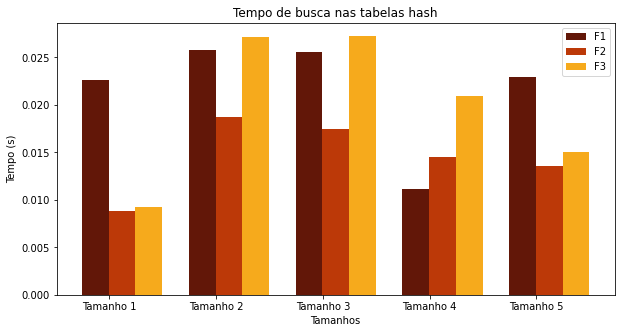

In [ ]:
bar_width = 0.25                       # Define a largura das barras

plt.figure(figsize=(10,5))             # Aumenta o tamanho do gráfico 

bar_1 = np.arange(len(exe_hash1))      # Primeiro é checada a largura da primeira barra 
bar_2 = [x + bar_width for x in bar_1] # e depois, de forma incremental, se posicionam as 
bar_3 = [x + bar_width for x in bar_2] # outras, pela referência das larguras das anteriores

'''
    Criacao da barras no modelo:
    [barra, lista_associada, cor, largura, nome_da legenda]
'''

plt.bar(bar_1,exe_hash1,color='#621708',width=bar_width,label='F1')
plt.bar(bar_2,exe_hash2,color='#BC3908',width=bar_width,label='F2')
plt.bar(bar_3,exe_hash3,color='#F6AA1C',width=bar_width,label='F3')

tamanhos = ["Tamanho 1","Tamanho 2","Tamanho 3","Tamanho 4","Tamanho 5"]
plt.xticks([t + 0.13 for t in range (len(exe_hash1))],[str(i) for i in tamanhos])
plt.ylabel("Tempo (s)")
plt.xlabel("Tamanhos")
plt.title("Tempo de busca nas tabelas hash")
plt.legend()                          # Cria legenda
plt.show()                            # Output do gráfico 

**Tabela de desempenho**

In [ ]:
'''
  Criacao de tabela no modelo:
  TAMANHO - FUNCAO - RESULTADO
'''
def criarTabela():
    print("Tamanho\t\t\tFuncao\t\t\tResultado")
    print("---------------------------------------------------------")
    print("%i\t\t%s\t\t\t%f"%(10856173,"F1",exe_hash1[0]))
    print("%i\t\t\t%s\t\t\t%f"%(7421923,"F2",exe_hash1[1]))
    print("%i\t\t\t%s\t\t\t%f"%(2600013,"F3",exe_hash1[2]))
    print("%i\t\t\t%s\t\t\t%f"%(780029,"F4",exe_hash1[3]))
    print("%i\t\t\t%s\t\t\t%f"%(23929,"F5",exe_hash1[4]))
    print("%i\t\t%s\t\t\t%f"%(10856173,"F1",exe_hash2[0]))
    print("%i\t\t\t%s\t\t\t%f"%(7421923,"F2",exe_hash2[1]))
    print("%i\t\t\t%s\t\t\t%f"%(2600013,"F3",exe_hash2[2]))
    print("%i\t\t\t%s\t\t\t%f"%(780029,"F4",exe_hash2[3]))
    print("%i\t\t\t%s\t\t\t%f"%(23929,"F5",exe_hash2[4]))
    print("%i\t\t%s\t\t\t%f"%(10856173,"F1",exe_hash3[0]))
    print("%i\t\t\t%s\t\t\t%f"%(7421923,"F2",exe_hash3[1]))
    print("%i\t\t\t%s\t\t\t%f"%(2600013,"F3",exe_hash3[2]))
    print("%i\t\t\t%s\t\t\t%f"%(780029,"F4",exe_hash3[3]))
    print("%i\t\t\t%s\t\t\t%f"%(23929,"F5",exe_hash3[4]))
       
criarTabela()

Tamanho			Funcao			Resultado
---------------------------------------------------------
10856173		F1			0.022610
7421923			F2			0.025740
2600013			F3			0.025550
780029			F4			0.011100
23929			F5			0.022950
10856173		F1			0.008790
7421923			F2			0.018690
2600013			F3			0.017470
780029			F4			0.014540
23929			F5			0.013610
10856173		F1			0.009260
7421923			F2			0.027190
2600013			F3			0.027260
780029			F4			0.020980
23929			F5			0.015080


# Referências bibliográficas

* TAMASSIA, Roberto. GOODRICH, Michael T. GOLDWASSER, Michael. **Data Structures and Algorithms in Python.** 1ª Ed. Wiley, 2013. 
* LEE, Kent D. HUBBARD, Steve. **Data Structures and Algorithms with Python** 1ª Ed. Springer International Publishing Switzerland, 2015.
* WILLIAMS, Hugh E. **Five Myths about Hash Tables.** Disponível em: https://hughewilliams.com/2012/10/01/five-myths-about-hash-tables/. Acesso em 06 de set. 2020. 
* ARKO, André. **Robin Hood hashing.** Disponível em: https://andre.arko.net/2017/08/24/robin-hood-hashing/. Acesso em 06 de set. 2020. 
* Feofiloff FEOFILOFF, Paulo. **Estrutura de dados - Hash.** Disponível em: https://www.ime.usp.br/~pf/estruturas-de-dados/aulas/st-hash.html. Acesso em 06 de set. 2020. 
* Enginner Man. **Data Structures: Hash Table implementation in C.** Disponível em: https://youtu.be/wg8hZxMRwcw. Acesso em 04 de set. 2020. 
* Codebasics. **Data Structures In Python - Collision Handling In Hash Table.** Disponível em: https://youtu.be/54iv1si4YCM. Acesso em 04 de set. 2020.
* BUDKEWICZ, Matheus. **Gráfico de barra com matplotlib.** Disponível em: https://medium.com/horadecodar/gr%C3%A1ficos-de-barra-com-matplotlib-85628bfc4351. Acesso em 09 de set. 2020.
* PAVAN, Juliana. **Tabelas em Python.** Disponível em: https://medium.com/zeroeumas/criando-uma-tabela-em-python-5a7c95d093e2. Acesso em 10 de set. 2020. 
* MARCELL, Guilherme. **Analisando computacionalmente a sequência de fibonacci.** Disponível em: https://medium.com/@marcellguilherme/fibonacci-9aded34b2fb6. Acesso em 09 de set. 2020. 